In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
owd = os.getcwd()

In [3]:
os.chdir(owd)
os.chdir("Data/non_employment_data")
# Non-employment datasets
age = pd.read_csv("age.csv", dtype = "int64")
birth_country = pd.read_csv("birth_country.csv", dtype = "float64")
marrital_status = pd.read_csv("marrital_status.csv", dtype = "float64")
race = pd.read_csv("race.csv", dtype = "float64")
region = pd.read_csv("region.csv", dtype = "float64")
family_size = pd.read_csv("family_size.csv", dtype = "float64")
resident_type = pd.read_csv("resident_type.csv", dtype = "float64")

children = pd.read_csv("children.csv", dtype = "int64")
constant_var = pd.read_csv("constant variables.csv", dtype = "float64")

In [4]:
df_non = pd.merge(age, birth_country, on=['ID', 'year'] , how='outer')
for i in (marrital_status, race, region, family_size, children, resident_type):
    df_non = pd.merge(df_non, i, on=['ID', 'year'] , how='outer')
    
df_non = pd.merge(df_non, constant_var, on='ID' , how='outer')

In [6]:
df_non.head()

,ID,year,age,birth_country,marrital_status,race,region,family_size,n_children,resident_type,...,marijuana,internet,distrimination,Life_satis,Emergencyfund,life control,health insurance,risk,self_esteem,religion
0,1,1979,20,1.0,1.0,NaN,1.0,5.0,0.0,NaN,...,NaN,NaN,0.0,NaN,NaN,2.0,0.0,NaN,NaN,7.0
1,1,1980,21,1.0,NaN,NaN,NaN,NaN,-5.0,NaN,...,NaN,NaN,0.0,NaN,NaN,2.0,0.0,NaN,NaN,7.0
2,1,1981,22,1.0,1.0,NaN,1.0,5.0,0.0,NaN,...,NaN,NaN,0.0,NaN,NaN,2.0,0.0,NaN,NaN,7.0
3,1,1982,23,1.0,NaN,NaN,NaN,NaN,-5.0,NaN,...,NaN,NaN,0.0,NaN,NaN,2.0,0.0,NaN,NaN,7.0
4,1,1983,24,1.0,NaN,NaN,NaN,NaN,-5.0,NaN,...,NaN,NaN,0.0,NaN,NaN,2.0,0.0,NaN,NaN,7.0


In [7]:
df_non.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 507440 entries, 0 to 507439
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   507440 non-null  int64  
 1   year                 507440 non-null  int64  
 2   age                  507440 non-null  int64  
 3   birth_country        507400 non-null  float64
 4   marrital_status      264459 non-null  float64
 5   race                 175000 non-null  float64
 6   region               261366 non-null  float64
 7   family_size          264496 non-null  float64
 8   n_children           228348 non-null  float64
 9   resident_type        227396 non-null  float64
 10  racial_cohort        507440 non-null  float64
 11  sample_id            507440 non-null  float64
 12  sex                  507440 non-null  float64
 13  mother_grade         475120 non-null  float64
 14  father_grade         435200 non-null  float64
 15  CESD Score       

In [8]:
df_non.shape

(507440, 29)

In [9]:
os.chdir(owd)
os.chdir("Data/employment_data")
# Employment datasets
industry_clean = pd.read_csv("industry_clean.csv", dtype = "int64")
Job_History = pd.read_csv("Job_History.csv", dtype = "int64")
job_type_clean = pd.read_csv("job_type_clean.csv", dtype = "int64")
why_left_clean = pd.read_csv("why_left_clean.csv", dtype = "int64")
cleaned_tenure = pd.read_csv("cleaned_tenure.csv", dtype = "int64")
hourly_payrate = pd.read_csv("hourly_payrate.csv", dtype = "int64")
hours_per_week = pd.read_csv("hours_per_week.csv", dtype = "int64")
hourly_payrate_revised = pd.read_csv("hourly_payrate_revised.csv", dtype = "int64")

Jobs_Data = pd.read_csv("Jobs_Data.csv", dtype = "int64")

In [10]:
hours_per_week

,ID,year,job_id,hours_per_week
0,1,1979,1,15
1,1,1979,2,38
2,1,1981,2,38
3,2,1979,1,35
4,2,1980,1,35
...,...,...,...,...
327346,12686,1989,1,40
327347,12686,1990,1,45
327348,12686,1991,1,45
327349,12686,1992,1,58


In [11]:
df_em = pd.merge(industry_clean, Job_History, on=['ID', 'year', "job_id"] , how='outer')

for i in (job_type_clean, why_left_clean, cleaned_tenure, hours_per_week, hourly_payrate_revised):
    df_em = pd.merge(df_em, i, on=['ID', 'year', "job_id"] , how='outer')

df_em = pd.merge(df_em, Jobs_Data, on=['ID', 'year'] , how='outer')

In [12]:
df_em.head()

,ID,year,job_id,industry,Start_Year,Stop_Year,job_type,why_left,weeks_tenure,hours_per_week,hourly_payrate,Switch_Job_1,Switch_Job_2,N_Jobs,Total_Jobs
0,1,1979,2,7.0,1978.0,1981.0,1.0,NaN,41.0,38.0,328.0,0.0,0.0,1.0,1.0
1,1,1979,1,NaN,NaN,NaN,NaN,3.0,21.0,15.0,NaN,0.0,0.0,1.0,1.0
2,1,1981,2,7.0,1978.0,1981.0,1.0,NaN,162.0,38.0,361.0,0.0,0.0,1.0,1.0
3,2,1979,1,5.0,1978.0,1993.0,1.0,NaN,42.0,35.0,385.0,0.0,0.0,1.0,4.0
4,2,1980,1,5.0,1978.0,1993.0,1.0,NaN,95.0,35.0,457.0,0.0,0.0,1.0,4.0


In [13]:
df_em.shape

(525510, 15)

In [14]:
df_em.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525510 entries, 0 to 525509
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              525510 non-null  int64  
 1   year            525510 non-null  int64  
 2   job_id          525510 non-null  int64  
 3   industry        285126 non-null  float64
 4   Start_Year      420734 non-null  float64
 5   Stop_Year       420734 non-null  float64
 6   job_type        287746 non-null  float64
 7   why_left        131195 non-null  float64
 8   weeks_tenure    325491 non-null  float64
 9   hours_per_week  328005 non-null  float64
 10  hourly_payrate  287826 non-null  float64
 11  Switch_Job_1    500991 non-null  float64
 12  Switch_Job_2    500991 non-null  float64
 13  N_Jobs          500991 non-null  float64
 14  Total_Jobs      500991 non-null  float64
dtypes: float64(12), int64(3)
memory usage: 64.1 MB


In [15]:
df = pd.merge(df_non, df_em, on = ["ID", "year"], how='outer')
df.head(5)

,ID,year,age,birth_country,marrital_status,race,region,family_size,n_children,resident_type,...,Stop_Year,job_type,why_left,weeks_tenure,hours_per_week,hourly_payrate,Switch_Job_1,Switch_Job_2,N_Jobs,Total_Jobs
0,1,1979,20,1.0,1.0,NaN,1.0,5.0,0.0,NaN,...,1981.0,1.0,NaN,41.0,38.0,328.0,0.0,0.0,1.0,1.0
1,1,1979,20,1.0,1.0,NaN,1.0,5.0,0.0,NaN,...,NaN,NaN,3.0,21.0,15.0,NaN,0.0,0.0,1.0,1.0
2,1,1980,21,1.0,NaN,NaN,NaN,NaN,-5.0,NaN,...,1981.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0
3,1,1981,22,1.0,1.0,NaN,1.0,5.0,0.0,NaN,...,1981.0,1.0,NaN,162.0,38.0,361.0,0.0,0.0,1.0,1.0
4,1,1982,23,1.0,NaN,NaN,NaN,NaN,-5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df["industry"][df["industry"] < 0] = np.NaN

<ipython-input-16-7d30a7fddc1b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["industry"][df["industry"] < 0] = np.NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 713224 entries, 0 to 713223
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   713224 non-null  int64  
 1   year                 713224 non-null  int64  
 2   age                  713224 non-null  int64  
 3   birth_country        713178 non-null  float64
 4   marrital_status      445441 non-null  float64
 5   race                 251509 non-null  float64
 6   region               440958 non-null  float64
 7   family_size          445503 non-null  float64
 8   n_children           377846 non-null  float64
 9   resident_type        373742 non-null  float64
 10  racial_cohort        713224 non-null  float64
 11  sample_id            713224 non-null  float64
 12  sex                  713224 non-null  float64
 13  mother_grade         668593 non-null  float64
 14  father_grade         613382 non-null  float64
 15  CESD Score       

In [18]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
ID,ID,0.000000
year,year,0.000000
age,age,0.000000
birth_country,birth_country,0.006450
marrital_status,marrital_status,37.545428
race,race,64.736324
region,region,38.173982
family_size,family_size,37.536735
n_children,n_children,47.022815
resident_type,resident_type,47.598230


In [19]:
df2 = df.corr()
df2["hourly_payrate"]

ID                    -0.052739
year                   0.305092
age                    0.303780
birth_country          0.007815
marrital_status        0.111716
race                   0.021497
region                 0.002706
family_size           -0.047129
n_children             0.115644
resident_type         -0.086908
racial_cohort          0.022414
sample_id             -0.080138
sex                   -0.059119
mother_grade           0.074314
father_grade           0.081726
CESD Score            -0.069806
drinking days          0.035768
injured               -0.020168
employer healthplan    0.070571
marijuana              0.025564
internet               0.060775
distrimination        -0.021582
Life_satis             0.035644
Emergencyfund          0.093386
life control          -0.057085
health insurance       0.065086
risk                  -0.008258
self_esteem            0.067425
religion               0.027484
job_id                 0.122813
industry               0.044773
Start_Ye

In [40]:
# hourly_payrate is y
# continuous variables: age, n_children, N_Jobs, Total_Jobs, weeks_tenure, marijuana, hours_per_week, risk
# categorical variables: marrital_status, Switch_Job_1, sex, industry
model_df = df[["ID", "age", "marrital_status", "n_children", "Switch_Job_1", "N_Jobs", 
     "hourly_payrate", "hours_per_week", "risk", "marijuana", "sex", "weeks_tenure"]]
model_df.head(5)

,ID,age,marrital_status,n_children,Switch_Job_1,N_Jobs,hourly_payrate,hours_per_week,risk,marijuana,sex,weeks_tenure
0,1,20,1.0,0.0,0.0,1.0,328.0,38.0,NaN,NaN,2.0,41.0
1,1,20,1.0,0.0,0.0,1.0,NaN,15.0,NaN,NaN,2.0,21.0
2,1,21,NaN,-5.0,0.0,1.0,NaN,NaN,NaN,NaN,2.0,NaN
3,1,22,1.0,0.0,0.0,1.0,361.0,38.0,NaN,NaN,2.0,162.0
4,1,23,NaN,-5.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN


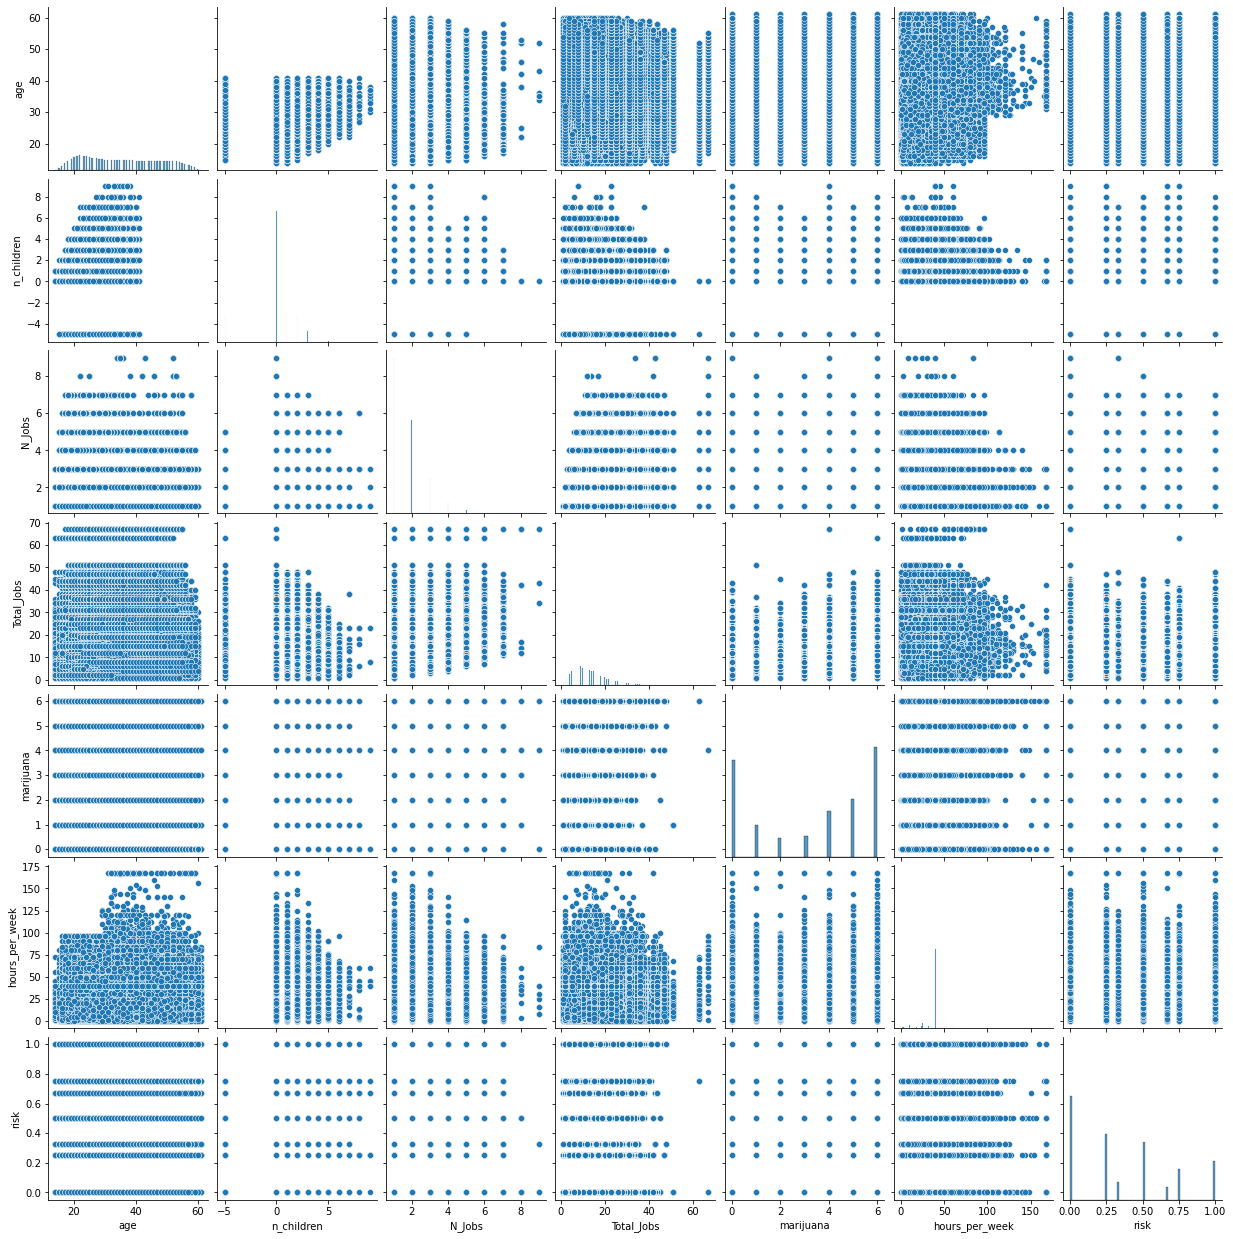

In [22]:
sn.pairplot(model_df[["age", "n_children", "N_Jobs", "Total_Jobs", "marijuana", "hours_per_week", "risk"]])

In [41]:
model_df["hourly_payrate"].describe()

count    287826.000000
mean       1154.903911
std        2217.766401
min           0.000000
25%         450.000000
50%         763.000000
75%        1328.000000
max      480769.000000
Name: hourly_payrate, dtype: float64

In [42]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 713224 entries, 0 to 713223
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               713224 non-null  int64  
 1   age              713224 non-null  int64  
 2   marrital_status  445441 non-null  float64
 3   n_children       377846 non-null  float64
 4   Switch_Job_1     500991 non-null  float64
 5   N_Jobs           500991 non-null  float64
 6   hourly_payrate   287826 non-null  float64
 7   hours_per_week   328005 non-null  float64
 8   risk             546944 non-null  float64
 9   marijuana        636278 non-null  float64
 10  sex              713224 non-null  float64
 11  weeks_tenure     325491 non-null  float64
dtypes: float64(10), int64(2)
memory usage: 70.7 MB


In [43]:
# only keep complete data
model_df = model_df.dropna()
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166566 entries, 41 to 713198
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               166566 non-null  int64  
 1   age              166566 non-null  int64  
 2   marrital_status  166566 non-null  float64
 3   n_children       166566 non-null  float64
 4   Switch_Job_1     166566 non-null  float64
 5   N_Jobs           166566 non-null  float64
 6   hourly_payrate   166566 non-null  float64
 7   hours_per_week   166566 non-null  float64
 8   risk             166566 non-null  float64
 9   marijuana        166566 non-null  float64
 10  sex              166566 non-null  float64
 11  weeks_tenure     166566 non-null  float64
dtypes: float64(10), int64(2)
memory usage: 16.5 MB


In [44]:
model_df["hourly_payrate"].describe()

count    166566.000000
mean        816.300289
std         780.949451
min           0.000000
25%         415.000000
50%         625.000000
75%        1000.000000
max       64903.000000
Name: hourly_payrate, dtype: float64

[Text(0.5, 1.0, 'Histogram of Hourly Pay Rate')]

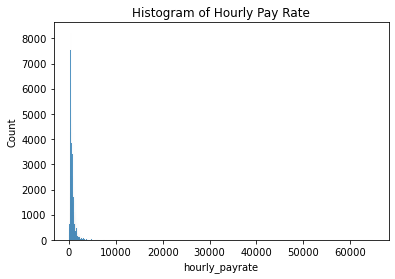

In [46]:
sn.histplot(model_df["hourly_payrate"]).set(title='Histogram of Hourly Pay Rate') 


In [47]:
con_df = model_df[["ID", "hourly_payrate", "age", "n_children", 
                   "N_Jobs", "marijuana", "hours_per_week", "risk", "weeks_tenure"]]

In [99]:
# One Hot Encoding for categorical variabels
marrital_status_df = pd.get_dummies(model_df["marrital_status"])
marrital_status_df.columns = ["Never Married", "Married", "Other"]
marrital_status_df.drop(["Other"], axis=1, inplace = True)

sex = pd.get_dummies(model_df["sex"])
sex.columns = ["male", "female"]
sex.drop(["female"], axis=1, inplace = True)

final_df = con_df.join(marrital_status_df)
final_df = final_df.join(sex)

final_df.head(5)

final_df = final_df[final_df["hourly_payrate"] != 0]

In [144]:
Y_df = final_df["hourly_payrate"]
X_df = final_df.drop(["hourly_payrate", "ID"], axis=1)

X_df = sm.add_constant(X_df)

In [146]:
import statsmodels.api as sm

#fit linear regression model
sm_fit = sm.OLS(Y_df, X_df).fit()

#view model summary
print(sm_fit.summary())

                            OLS Regression Results                            
Dep. Variable:         hourly_payrate   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     4007.
Date:                Fri, 29 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:51:47   Log-Likelihood:            -1.3276e+06
No. Observations:              166542   AIC:                         2.655e+06
Df Residuals:                  166531   BIC:                         2.655e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -606.4391     13.109    -46.

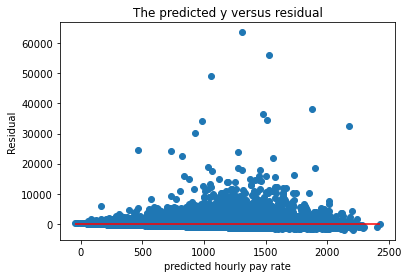

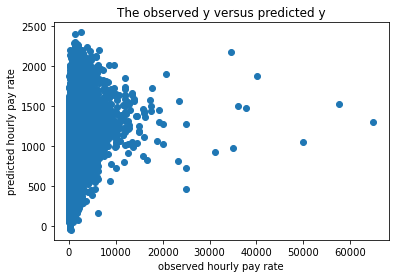

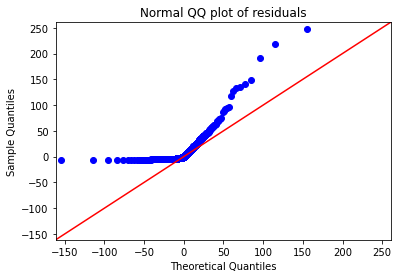

In [147]:
import scipy.stats as stats

res = Y_df - sm_fit.predict(X_df)
res
plt.scatter(sm_fit.predict(X_df), res)
plt.hlines(0, min(sm_fit.predict(X_df)), max(sm_fit.predict(X_df)), color='red')
plt.xlabel("predicted hourly pay rate")
plt.ylabel("Residual")
plt.title("The predicted y versus residual")
plt.show()
plt.scatter(Y_df, sm_fit.predict(X_df))
plt.xlabel("observed hourly pay rate")
plt.ylabel("predicted hourly pay rate")
plt.title("The observed y versus predicted y")
plt.show()

sm.qqplot(res, stats.t, fit=True, line="45")
plt.title('Normal QQ plot of residuals')
plt.show()

In [152]:
Y_df_log = np.log(Y_df)
Y_df_log

sm_fit2 = sm.OLS(Y_df_log, X_df).fit()

#view model summary
print(sm_fit2.summary())

                            OLS Regression Results                            
Dep. Variable:         hourly_payrate   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     8636.
Date:                Fri, 29 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:54:48   Log-Likelihood:            -1.3808e+05
No. Observations:              166542   AIC:                         2.762e+05
Df Residuals:                  166531   BIC:                         2.763e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.7756      0.010    460.

In [153]:
# transform coefficients
(np.exp(sm_fit2.params)-1) * 100

const             11758.724918
age                   5.617470
n_children           -6.332821
N_Jobs               -2.658862
marijuana             1.496762
hours_per_week        0.088670
risk                 -1.313952
weeks_tenure          0.078241
Never Married        -0.969176
Married              16.156823
male                 16.574989
dtype: float64

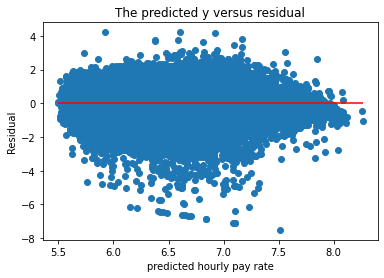

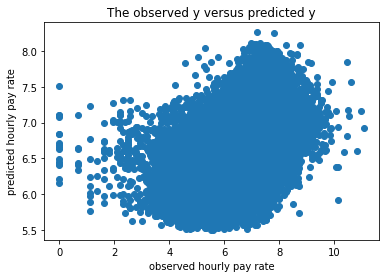

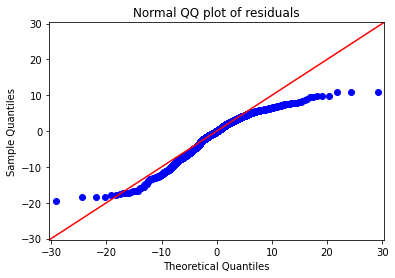

In [155]:
res2 = Y_df_log - sm_fit2.predict(X_df)

plt.scatter(sm_fit2.predict(X_df), res2)
plt.hlines(0, min(sm_fit2.predict(X_df)), max(sm_fit2.predict(X_df)), color='red')
plt.xlabel("predicted hourly pay rate")
plt.ylabel("Residual")
plt.title("The predicted y versus residual")
plt.show()
plt.scatter(Y_df_log, sm_fit2.predict(X_df))
plt.xlabel("observed hourly pay rate")
plt.ylabel("predicted hourly pay rate")
plt.title("The observed y versus predicted y")
plt.show()

sm.qqplot(res2, stats.t, fit=True, line="45")
plt.title('Normal QQ plot of residuals')
plt.show()

In [123]:
Y_df_log.describe()

,hourly_payrate
count,166542.000000
mean,6.470077
std,0.683206
min,0.000000
25%,6.028279
50%,6.437752
75%,6.907755
max,11.080649


[Text(0.5, 1.0, 'Histogram of y after log transformation')]

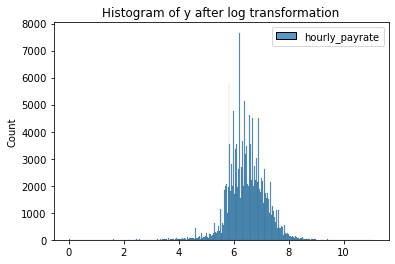

In [125]:
sn.histplot(Y_df_log).set(title = "Histogram of y after log transformation")